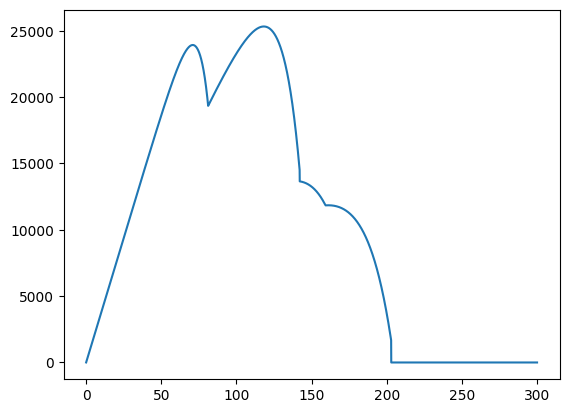

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Shaded(object):
    def __init__(self):
        self.G = [100, 1000]  # read irradiance # Solar radiation in mW / sq.cm / Esto es la irradiancia para panel cuando [sombredo,sin_sombra]
        #self.T = 25  # read temperature # ojo con kelvin 273
        #self.SH = [4, 10, 7, 10, 10, 10]  # Shaded modules
        self.Mp = 10  # Modules in parallel
        self.Ng = [40, 38, 22]  # Parallel-connected series assemblies
        self.Iscr_sh = 0.375

    def data(self, Irradiancia_maxima, T, V, SH):

        # G_ar = np.array(G) # Solar radiation in mW/sq.cm

        pv = Panel()
        IUN = []
        ISH = []
        Ipv = []

        for j in range(len(self.Ng)):
            # IUN_i = pv.calc_pv(Irradiancia_maxima, T, V, SH[j*2])[0] # asi estaria bien hecho, pero como dejamos fija la irradiancia maxima lo tomamos del self.G[1]
            IUN_i = pv.calc_pv(self.G[1], T, V, SH[j*2])[0]
            if IUN_i < 0:
                IUN_i = 0
            IUN.append(IUN_i)
            ISH_i = pv.calc_pv(self.G[0], T, V, SH[j*2+1])[0]
            if ISH_i< 0:
                ISH_i = 0
            ISH.append(ISH_i)

        for jj in (range(len(self.Ng))):
            if IUN[jj] > self.Iscr_sh:
                Ipv.append(IUN[jj])
            else:
                Ipv.append(ISH[jj])

        
        IT = Ipv[0] * self.Ng[0] + Ipv[1] * self.Ng[1] + Ipv[2] * self.Ng[2]
        VT = V
        PT = IT*VT
        return IT, VT, PT 

class Panel(object):

    def __init__(self):
        self.TK = 273 # Kelvin temperature
        self.Tr1 = 40  # Reference temperature in degree fahrenheit
        # self.S = 100  # Solar radiation in mW / sq.cm
        self.ki = 0.00023  # in A / K
        self.Iscr = 3.75  # SC Current at ref.temp. in A
        self.Irr = 0.000021  # in A
        self.k = 1.38065e-23  # Boltzmann constant
        self.q = 1.6022e-19  # charge of an electron
        self.A = 2.15 # ideality factor
        self.Eg0 = 1.166 # band gap energy
        self.alpha = 0.473
        self.beta = 636
        # panel composed of Np parallel modules each one including Ns photovoltaic cells connected
        self.Np = 1
        self.Ns = 36

    def calc_pv(self, G, T, vx, SH):
        # cell temperature
        Tcell = T + self.TK
        # cell reference temperature in kelvin
        Tr = ((self.Tr1 - 32) * (5 / 9)) + 273
        # band gap energy of semiconductor
        Eg = self.Eg0 - (self.alpha * Tcell * Tcell) / (Tcell + self.beta) * self.q
        # generated photocurrent
        Iph = (self.Iscr + self.ki * (Tcell - Tr)) * (G / 1000)
        # cell reverse saturation current
        Irs = self.Irr * ((Tcell / Tr) ** 3) * np.exp(self.q * Eg / (self.k * self.A) * ((1 / Tr) - (1 / Tcell)))
        # panel output current
        I = self.Np * Iph - self.Np * Irs * (np.exp(self.q / (self.k * Tcell * self.A) * vx * (1/SH) / self.Ns) - 1)
        # panel output voltage
        V = vx # este es el Vg?
        # panel power
        P = vx * I

        return I,V,P

                
Voltage = 0.
Power = 0.
Temp = 25.
Irr = 1000.
# a = random.sample([1,2,3,4,5,6,7,8,9,10],1)[0]
# b = random.sample([1,2,3,4,5,6,7,8,9,10],1)[0]
# c = random.sample([1,2,3,4,5,6,7,8,9,10],1)[0]
a = 4
b = 7
c = 10
SH = [a, 10, b, 10, c, 10]

powerlst = []
voltagelst = []

for i in range(30000):
    Voltage += 0.01
    pv = Shaded()
    Current, Voltage, Power = pv.data(Irr, Temp, Voltage, SH)
    powerlst.append(Power)
    voltagelst.append(Voltage)

plt.plot(voltagelst, powerlst)

In [2]:
Pmax = np.zeros((11, 11, 11))
for i in range(1, 11):
    for j in range(1, 11):
        for k in range(1, 11):
            Voltage = 0.
            Power = 0.
            Temp = 25.
            Irr = 1000.
            a, b, c = i, j, k
            SH = [a, 10, b, 10, c, 10]
            powerlst = []
            for ite in range(21200):
                Voltage += 0.01
                pv = Shaded()
                Current, Voltage, Power = pv.data(Irr, Temp, Voltage, SH)
                powerlst.append(Power)
            Pmax[i][j][k] = round(max(powerlst), 2)
            print(i, j, k, Pmax[i][j][k])

1 1 1 5385.2
1 1 2 5547.59
1 1 3 5549.78
1 1 4 6642.08
1 1 5 8272.7
1 1 6 9846.48
1 1 7 11285.33
1 1 8 12455.3
1 1 9 13239.66
1 1 10 13671.48
1 2 1 5697.96
1 2 2 6947.28
1 2 3 7308.77
1 2 4 7330.14
1 2 5 8272.7
1 2 6 9846.48
1 2 7 11285.33
1 2 8 12455.3
1 2 9 13239.66
1 2 10 13671.48
1 3 1 7269.89
1 3 2 7734.99
1 3 3 10419.35
1 3 4 10918.24
1 3 5 10979.53
1 3 6 10993.29
1 3 7 11285.33
1 3 8 12455.3
1 3 9 13239.66
1 3 10 13671.48
1 4 1 9685.53
1 4 2 9685.53
1 4 3 11487.4
1 4 4 13887.75
1 4 5 14493.52
1 4 6 14609.04
1 4 7 14640.28
1 4 8 14651.7
1 4 9 14656.83
1 4 10 14659.5
1 5 1 12085.19
1 5 2 12085.19
1 5 3 12085.19
1 5 4 15158.79
1 5 5 17346.37
1 5 6 18033.41
1 5 7 18209.14
1 5 8 18264.7
1 5 9 18286.66
1 5 10 18296.94
1 6 1 14443.54
1 6 2 14443.54
1 6 3 14443.54
1 6 4 15458.99
1 6 5 18760.05
1 6 6 20779.69
1 6 7 21524.36
1 6 8 21759.07
1 6 9 21843.59
1 6 10 21879.56
1 7 1 16700.3
1 7 2 16700.3
1 7 3 16700.3
1 7 4 16700.3
1 7 5 19208.93
1 7 6 22284.0
1 7 7 24149.52
1 7 8 24923.1
1 7 9 

6 5 8 29369.76
6 5 9 29396.61
6 5 10 29408.98
6 6 1 25967.95
6 6 2 25967.95
6 6 3 25967.95
6 6 4 25967.95
6 6 5 30030.93
6 6 6 32311.2
6 6 7 32970.93
6 6 8 33164.04
6 6 9 33233.19
6 6 10 33262.88
6 7 1 27302.93
6 7 2 27302.93
6 7 3 27302.93
6 7 4 27302.93
6 7 5 30576.82
6 7 6 33543.11
6 7 7 34524.07
6 7 8 34814.38
6 7 9 34915.77
6 7 10 34958.13
6 8 1 27761.9
6 8 2 27761.9
6 8 3 27761.9
6 8 4 27761.9
6 8 5 30745.69
6 8 6 33937.7
6 8 7 35038.23
6 8 8 35365.77
6 8 9 35479.37
6 8 10 35526.45
6 9 1 27929.95
6 9 2 27929.95
6 9 3 27929.95
6 9 4 27929.95
6 9 5 30809.76
6 9 6 34080.66
6 9 7 35222.99
6 9 8 35563.5
6 9 9 35681.32
6 9 10 35730.02
6 10 1 28001.29
6 10 2 28001.29
6 10 3 28001.29
6 10 4 28001.29
6 10 5 30838.63
6 10 6 34141.67
6 10 7 35300.6
6 10 8 35646.2
6 10 9 35765.67
6 10 10 35815.01
7 1 1 17377.4
7 1 2 17377.4
7 1 3 17377.4
7 1 4 17377.4
7 1 5 19801.02
7 1 6 22946.47
7 1 7 24826.81
7 1 8 25595.06
7 1 9 25875.91
7 1 10 25988.47
7 2 1 17377.4
7 2 2 17377.4
7 2 3 17377.4
7 2 4 173

In [3]:
print(Pmax)

[[[    0.       0.       0.   ...     0.       0.       0.  ]
  [    0.       0.       0.   ...     0.       0.       0.  ]
  [    0.       0.       0.   ...     0.       0.       0.  ]
  ...
  [    0.       0.       0.   ...     0.       0.       0.  ]
  [    0.       0.       0.   ...     0.       0.       0.  ]
  [    0.       0.       0.   ...     0.       0.       0.  ]]

 [[    0.       0.       0.   ...     0.       0.       0.  ]
  [    0.    5385.2   5547.59 ... 12455.3  13239.66 13671.48]
  [    0.    5697.96  6947.28 ... 12455.3  13239.66 13671.48]
  ...
  [    0.   18730.11 18730.11 ... 27367.79 28124.56 28436.94]
  [    0.   20344.65 20344.65 ... 28836.42 30259.   30926.24]
  [    0.   21418.77 21418.77 ... 29556.61 31518.07 32573.75]]

 [[    0.       0.       0.   ...     0.       0.       0.  ]
  [    0.    5719.46  7138.3  ... 12455.3  13239.66 13671.48]
  [    0.    8667.14 10770.4  ... 12455.3  13239.66 13671.48]
  ...
  [    0.   18730.11 18730.11 ... 27367.79 28124

In [6]:
np.save('Pmax.npy', Pmax)
# Pmax = np.load('Pmax.npy')